In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("dataset_final.csv")

In [2]:
df

adsorption_measurement.adsorption_energy  \
0                                        -4.29   
1                                        -0.56   
2                                        -3.14   
3                                        -0.50   
4                                        -1.67   
...                                        ...   
1995                                     -1.72   
1996                                      1.66   
1997                                     -1.57   
1998                                     -2.51   
1999                                     -0.61   

     adsorption_measurement.method.software  \
0                                    Dacapo   
1                                    Dacapo   
2                                     CETEP   
3                                     CETEP   
4                                      VASP   
...                                     ...   
1995                       Quantum ESPRESSO   
1996                       Quantum ESPRESSO   
1997                       Quantum ESPRESSO   
1998                       Quantum ESPRESSO   
1999                                 Dacapo   

     adsorption_measurement.method.exchange_correlation  \
0                                                  PW91   
1                                                  PW91   
2                                                  PW91   
3                                                  PW91   
4                                                  PW91   
...                                                 ...   
1995                                           BEEF-vdW   
1996                                           BEEF-vdW   
1997                                           BEEF-vdW   
1998                                           BEEF-vdW   
1999                                               RPBE   

     adsorption_measurement.method.basis_set  \
0                                 plane wave   
1                                 plane wave   
2                                 plane wave   
3                                 plane wave   
4                                 plane wave   
...                                      ...   
1995                              plane wave   
1996                              plane wave   
1997                              plane wave   
1998                              plane wave   
1999                              plane wave   

     adsorption_measurement.method.potentials  \
0                   ultrasoft pseudopotential   
1                   ultrasoft pseudopotential   
2             norm-conserving pseudopotential   
3             norm-conserving pseudopotential   
4                   ultrasoft pseudopotential   
...                                       ...   
1995                 projector augmented wave   
1996                 projector augmented wave   
1997                 projector augmented wave   
1998                 projector augmented wave   
1999                ultrasoft pseudopotential   

     adsorption_measurement.method.is_spin_polarization  \
0                                                   NaN   
1                                                   NaN   
2                                                  True   
3                                                  True   
4                                                   NaN   
...                                                 ...   
1995                                                NaN   
1996                                                NaN   
1997                                                NaN   
1998                                                NaN   
1999                                              False   

     adsorption_measurement.method.is_zero_point_energy  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                   

# **Label**

## Adsorption Energy

In [3]:
df["adsorption_measurement.adsorption_energy"].isnull().values.any()

False

Therefore, there are no missing values yet.

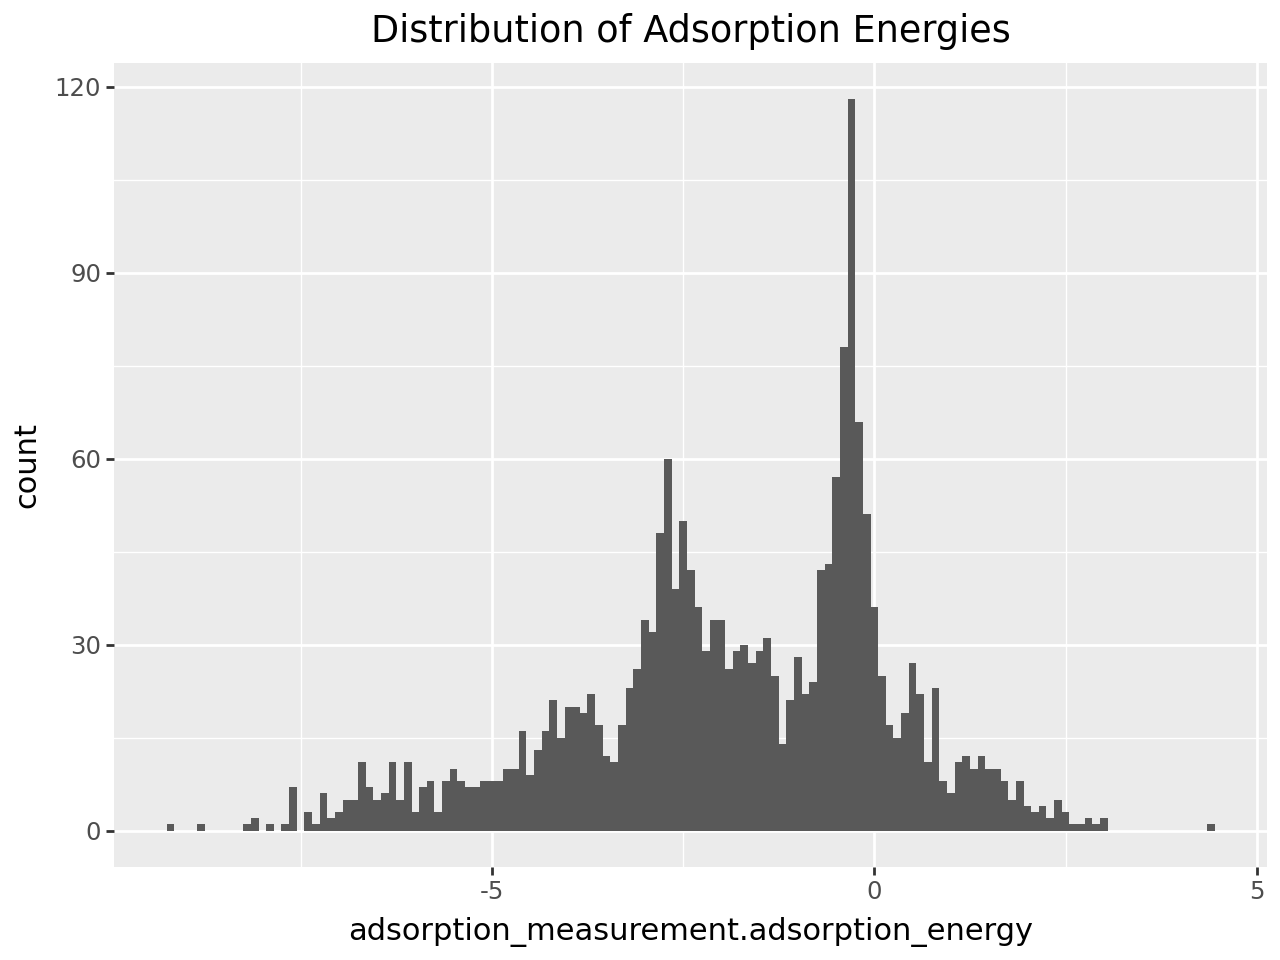

In [4]:
from plotnine import *
(
    ggplot(df, aes(x="adsorption_measurement.adsorption_energy"))
    + geom_histogram(binwidth=0.1)
    +ggtitle("Distribution of Adsorption Energies")
)

In [6]:
df["adsorption_measurement.adsorption_energy"].min()

-9.2

In [5]:
df = df.rename(columns={'adsorption_measurement.adsorption_energy': 'adsorption_energy'})

# **Methods**

## Software

In [6]:
df["adsorption_measurement.method.software"].isnull().values.any()

False

In [7]:
len(df)

2000

In [8]:
for instance in range(len(df)):
    if df.at[instance, "adsorption_measurement.method.software"] == '[no data]':
        df.at[instance, "adsorption_measurement.method.software"] = np.nan

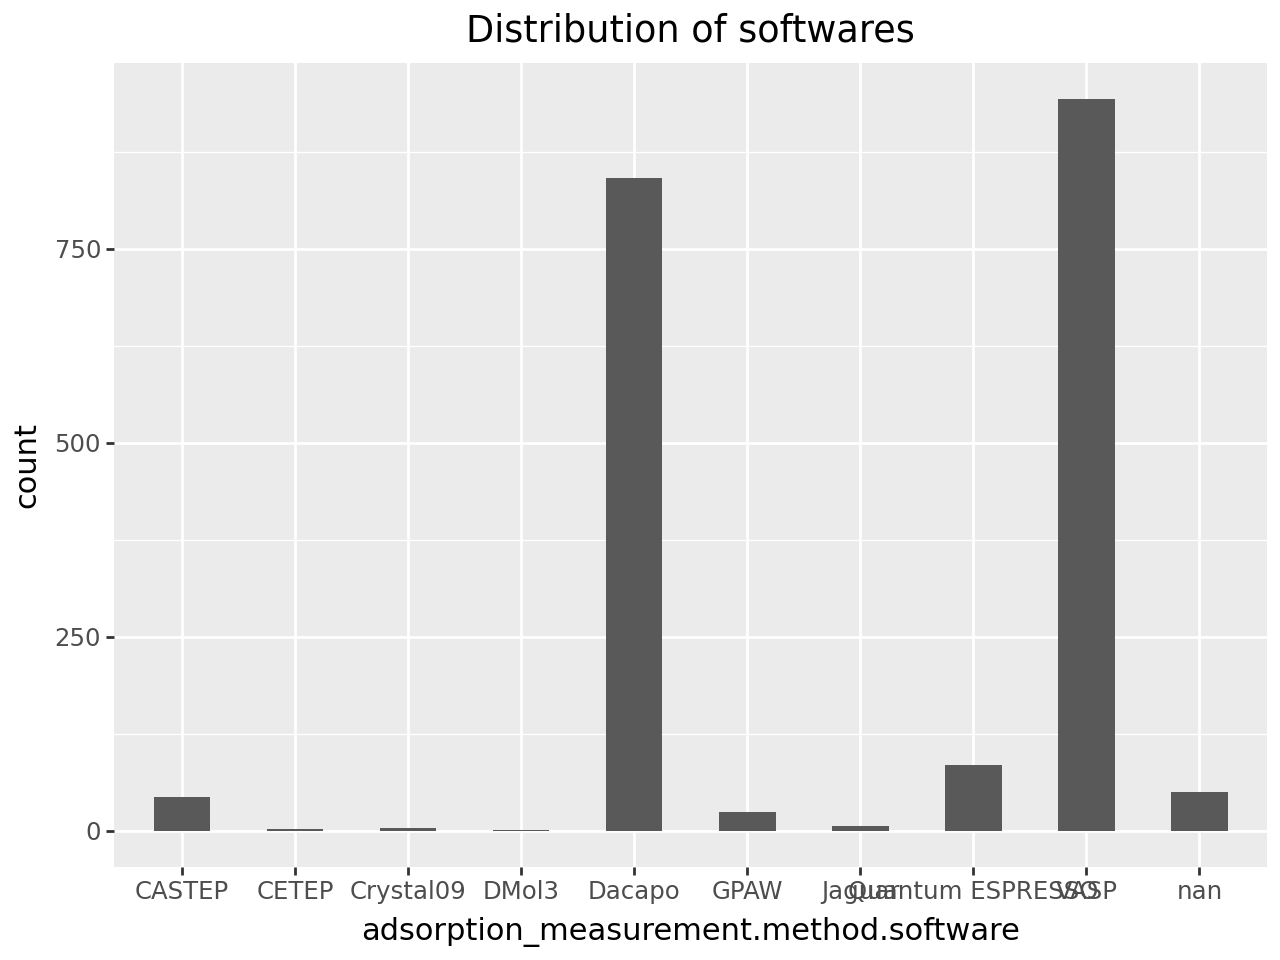

In [9]:
software_bar_chart = (
    ggplot(df, aes(x="adsorption_measurement.method.software"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of softwares")
)
software_bar_chart

### Imputation of Software data

In [10]:
software = pd.DataFrame(df["adsorption_measurement.method.software"])
software

adsorption_measurement.method.software
0                                    Dacapo
1                                    Dacapo
2                                     CETEP
3                                     CETEP
4                                      VASP
...                                     ...
1995                       Quantum ESPRESSO
1996                       Quantum ESPRESSO
1997                       Quantum ESPRESSO
1998                       Quantum ESPRESSO
1999                                 Dacapo

[2000 rows x 1 columns]

In [11]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
software = imp.fit_transform(software)
software = pd.DataFrame(software)

In [12]:
df["adsorption_measurement.method.software"].isnull().values.any()

True

In [13]:
df = df.drop(columns=["adsorption_measurement.method.software"])
df = pd.concat([df, software], axis=1)

In [14]:
df = df.rename(columns={0: 'software'})

In [15]:
df

adsorption_energy adsorption_measurement.method.exchange_correlation  \
0                 -4.29                                               PW91   
1                 -0.56                                               PW91   
2                 -3.14                                               PW91   
3                 -0.50                                               PW91   
4                 -1.67                                               PW91   
...                 ...                                                ...   
1995              -1.72                                           BEEF-vdW   
1996               1.66                                           BEEF-vdW   
1997              -1.57                                           BEEF-vdW   
1998              -2.51                                           BEEF-vdW   
1999              -0.61                                               RPBE   

     adsorption_measurement.method.basis_set  \
0                                 plane wave   
1                                 plane wave   
2                                 plane wave   
3                                 plane wave   
4                                 plane wave   
...                                      ...   
1995                              plane wave   
1996                              plane wave   
1997                              plane wave   
1998                              plane wave   
1999                              plane wave   

     adsorption_measurement.method.potentials  \
0                   ultrasoft pseudopotential   
1                   ultrasoft pseudopotential   
2             norm-conserving pseudopotential   
3             norm-conserving pseudopotential   
4                   ultrasoft pseudopotential   
...                                       ...   
1995                 projector augmented wave   
1996                 projector augmented wave   
1997                 projector augmented wave   
1998                 projector augmented wave   
1999                ultrasoft pseudopotential   

     adsorption_measurement.method.is_spin_polarization  \
0                                                   NaN   
1                                                   NaN   
2                                                  True   
3                                                  True   
4                                                   NaN   
...                                                 ...   
1995                                                NaN   
1996                                                NaN   
1997                                                NaN   
1998                                                NaN   
1999                                              False   

     adsorption_measurement.method.is_zero_point_energy  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3                                                   NaN   
4                                                   NaN   
...                                                 ...   
1995                                                NaN   
1996                                                NaN   
1997                                                NaN   
1998                                                NaN   
1999                                              False   

     adsorption_measurement.method.is_fixed_substrate  \
0                                               False   
1                                               False   
2                                                 NaN   
3                                                 NaN   
4                                                 NaN   
...                                               ...   
1995                                            False   
1996                         

In [16]:
df['software'].isnull().values.any()

False

## Exchange Correlation

In [17]:
df["adsorption_measurement.method.exchange_correlation"].isnull().values.any()

False

No missing values!

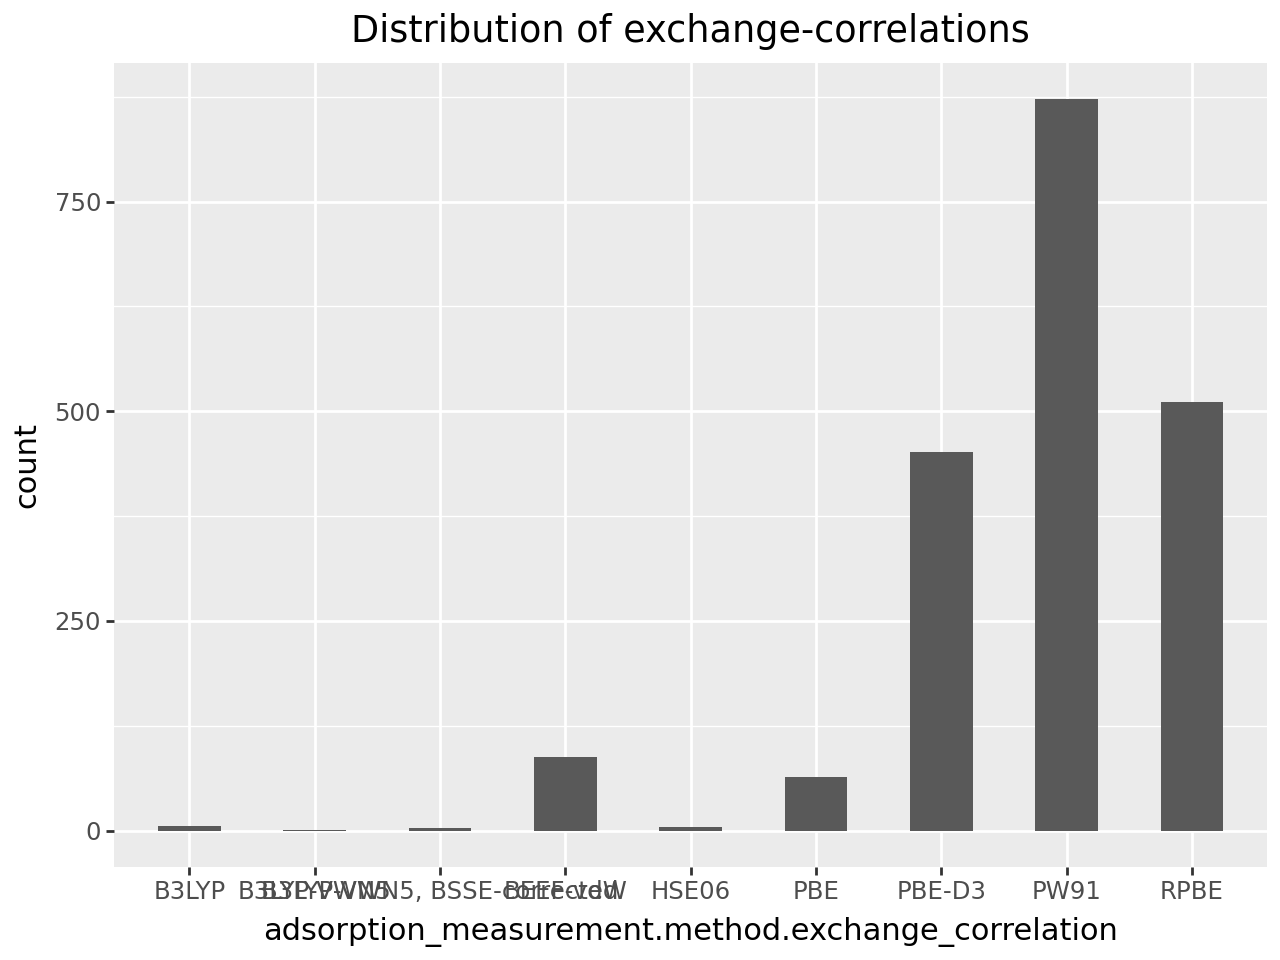

In [18]:
from plotnine import ggplot, aes, geom_histogram, ggtitle
XC_bar_chart = (
    ggplot(df, aes(x="adsorption_measurement.method.exchange_correlation"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of exchange-correlations")
)
XC_bar_chart

In [19]:
df = df.rename(columns={"adsorption_measurement.method.exchange_correlation": 'exchange_correlation'})

## Basis Set

In [20]:
df["adsorption_measurement.method.basis_set"].isnull().values.any()

True

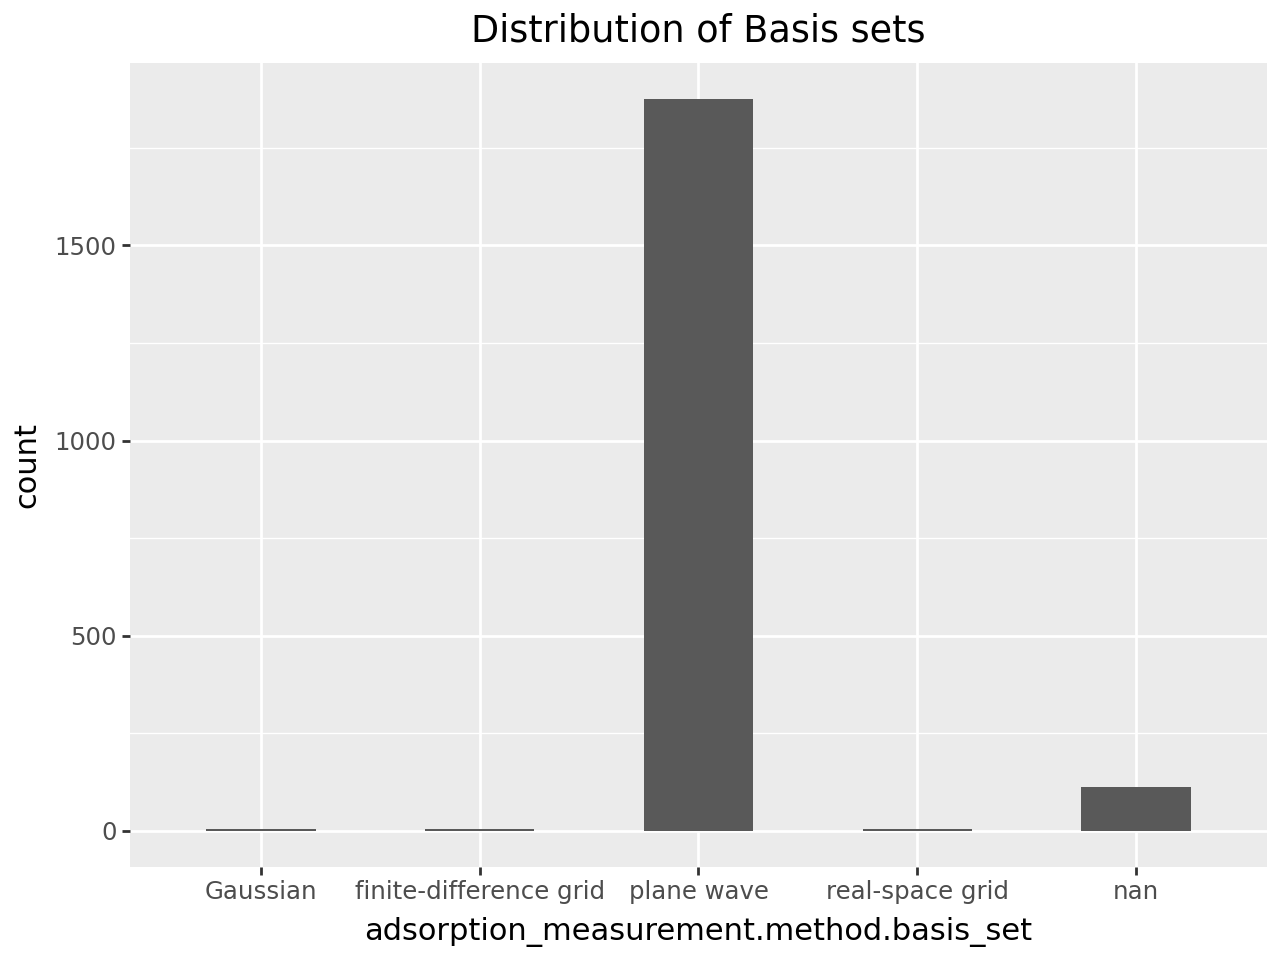

In [21]:
from plotnine import ggplot, aes, geom_histogram, ggtitle
XC_bar_chart = (
    ggplot(df, aes(x="adsorption_measurement.method.basis_set"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of Basis sets")
)
XC_bar_chart

The distribution is heavily skewed towards plane wave. This attribute probably does not provide any additional knowledge. Therefore, this attribute will be droped. 

In [22]:
df = df.drop(columns=["adsorption_measurement.method.basis_set"])

## Potentials

In [23]:
df["adsorption_measurement.method.potentials"].isnull().values.any()

False

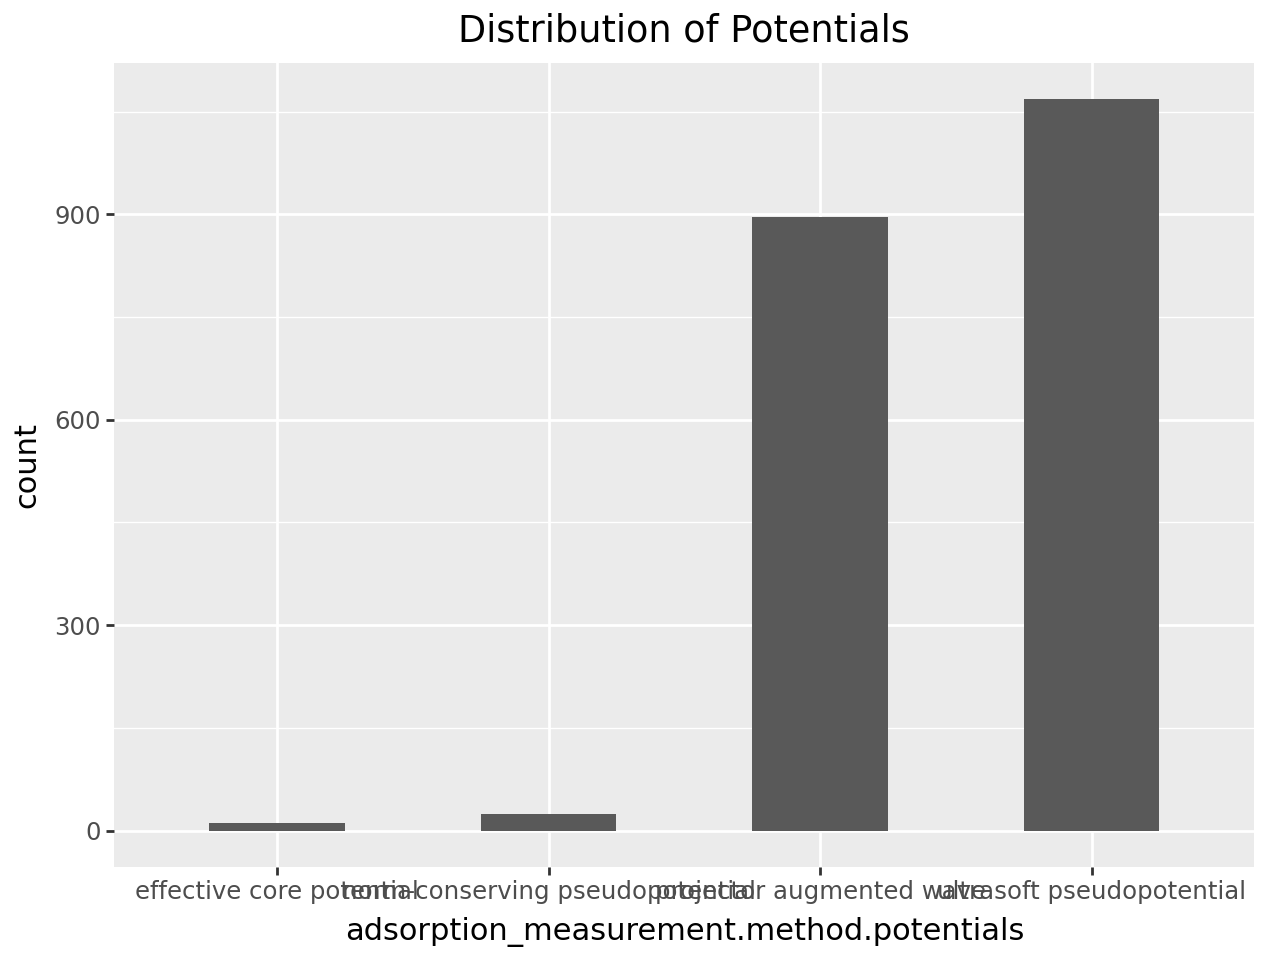

In [24]:
from plotnine import ggplot, aes, geom_histogram, ggtitle
XC_bar_chart = (
    ggplot(df, aes(x="adsorption_measurement.method.potentials"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of Potentials")
)
XC_bar_chart

In [25]:
df = df.rename(columns={"adsorption_measurement.method.potentials": 'potentials'})

In [26]:
df.head()

adsorption_energy exchange_correlation                       potentials  \
0              -4.29                 PW91        ultrasoft pseudopotential   
1              -0.56                 PW91        ultrasoft pseudopotential   
2              -3.14                 PW91  norm-conserving pseudopotential   
3              -0.50                 PW91  norm-conserving pseudopotential   
4              -1.67                 PW91        ultrasoft pseudopotential   

  adsorption_measurement.method.is_spin_polarization  \
0                                                NaN   
1                                                NaN   
2                                               True   
3                                               True   
4                                                NaN   

  adsorption_measurement.method.is_zero_point_energy  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  adsorption_measurement.method.is_fixed_substrate  \
0                                            False   
1                                            False   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  adsorption_measurement.adsorbate_species.formula  \
0                                                O   
1                                               O2   
2                                                O   
3                                               O2   
4                                               O2   

  adsorption_measurement.adsorbate_species.smiles  \
0                                             [O]   
1                                             O=O   
2                                             [O]   
3                                             O=O   
4                                             O=O   

  adsorption_measurement.adsorbate_species.molecular_formula  \
0                                                  O           
1                                                 O2           
2                                                  O           
3                                                 O2           
4                                                 O2           

  adsorption_measurement.adsorbate_species.connectivity_smiles  ... 26 27 28  \
0                                                [O]            ...  0  0  0   
1                                             [O][O]            ...  0  0  0   
2                                                [O]            ...  0  0  0   
3                                             [O][O]            ...  0  0  0   
4                                             [O][O]            ...  0  0  0   

   29  30  double triple termination_atomic_num  facet_num software  
0   0   0       0      0                   29.0      111.0   Dacapo  
1   0   0       1      0                   29.0      111.0   Dacapo  
2   0   0       0      0                   47.0      110.0    CETEP  
3   0   0       1      0                   47.0      110.0    CETEP  
4   0   0       1      0                   28.0      111.0     VASP  

[5 rows x 57 columns]

## Spin-Polarization

In [27]:
df["adsorption_measurement.method.is_spin_polarization"].isnull().values.any()

True

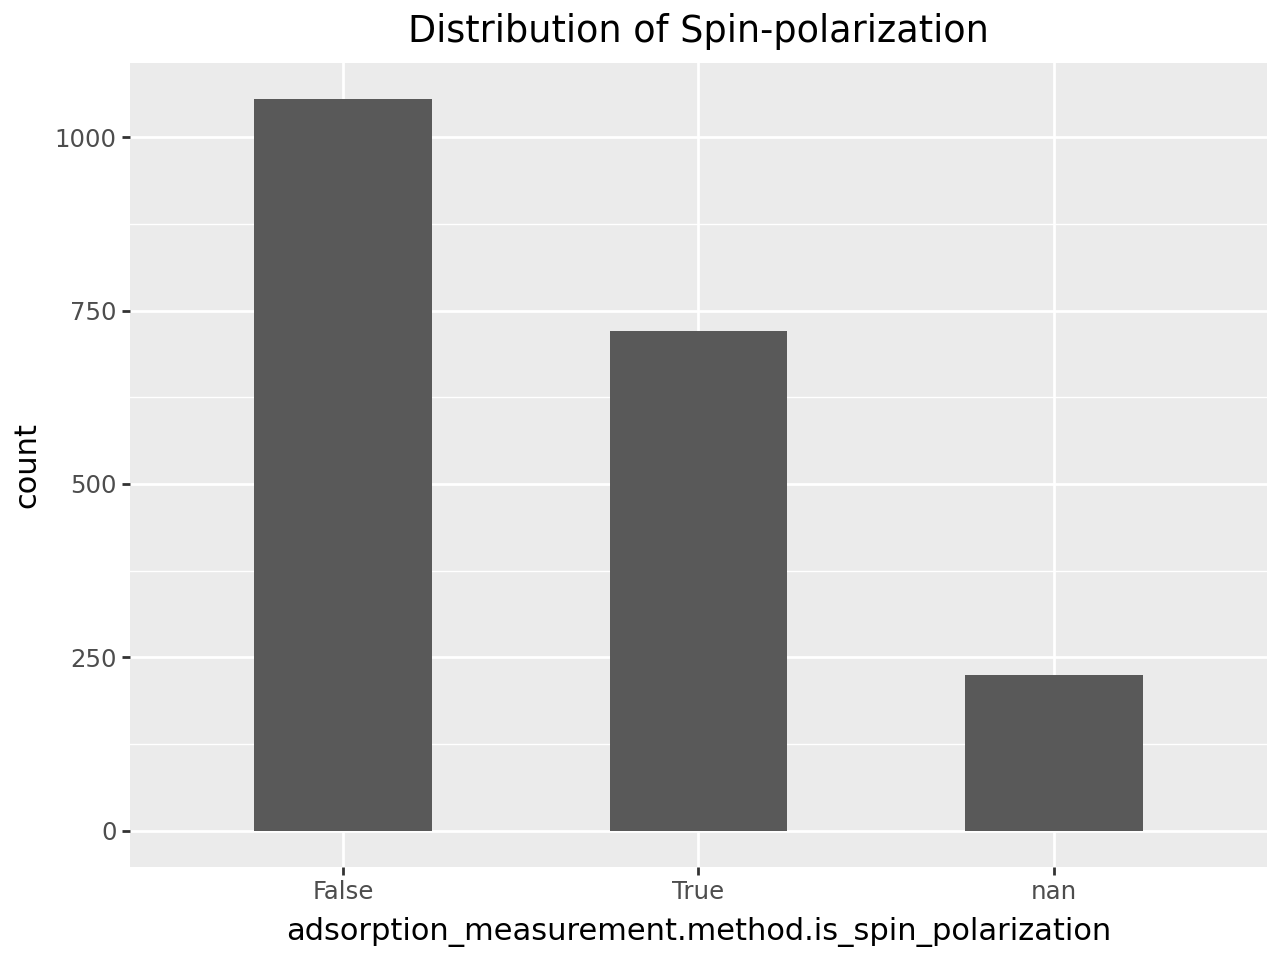

In [28]:
from plotnine import ggplot, aes, geom_histogram, ggtitle
Spin_Polar_bar_chart = (
    ggplot(df, aes(x="adsorption_measurement.method.is_spin_polarization"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of Spin-polarization")
)
Spin_Polar_bar_chart

In [29]:
spin_polar = pd.DataFrame(df["adsorption_measurement.method.is_spin_polarization"])
spin_polar

adsorption_measurement.method.is_spin_polarization
0                                                   NaN
1                                                   NaN
2                                                  True
3                                                  True
4                                                   NaN
...                                                 ...
1995                                                NaN
1996                                                NaN
1997                                                NaN
1998                                                NaN
1999                                              False

[2000 rows x 1 columns]

In [30]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
spin_polar = imp.fit_transform(spin_polar)
spin_polar = pd.DataFrame(spin_polar)

In [31]:
df = df.drop(columns=["adsorption_measurement.method.is_spin_polarization"])
df = pd.concat([df, spin_polar], axis=1)
df = df.rename(columns={0: 'spin_polarization'})

In [32]:
df.head()

adsorption_energy exchange_correlation                       potentials  \
0              -4.29                 PW91        ultrasoft pseudopotential   
1              -0.56                 PW91        ultrasoft pseudopotential   
2              -3.14                 PW91  norm-conserving pseudopotential   
3              -0.50                 PW91  norm-conserving pseudopotential   
4              -1.67                 PW91        ultrasoft pseudopotential   

  adsorption_measurement.method.is_zero_point_energy  \
0                                                NaN   
1                                                NaN   
2                                                NaN   
3                                                NaN   
4                                                NaN   

  adsorption_measurement.method.is_fixed_substrate  \
0                                            False   
1                                            False   
2                                              NaN   
3                                              NaN   
4                                              NaN   

  adsorption_measurement.adsorbate_species.formula  \
0                                                O   
1                                               O2   
2                                                O   
3                                               O2   
4                                               O2   

  adsorption_measurement.adsorbate_species.smiles  \
0                                             [O]   
1                                             O=O   
2                                             [O]   
3                                             O=O   
4                                             O=O   

  adsorption_measurement.adsorbate_species.molecular_formula  \
0                                                  O           
1                                                 O2           
2                                                  O           
3                                                 O2           
4                                                 O2           

  adsorption_measurement.adsorbate_species.connectivity_smiles  \
0                                                [O]             
1                                             [O][O]             
2                                                [O]             
3                                             [O][O]             
4                                             [O][O]             

  adsorption_measurement.bulk_surface_property_set.termination  ... 27 28  29  \
0                                                 Cu            ...  0  0   0   
1                                                 Cu            ...  0  0   0   
2                                                 Ag            ...  0  0   0   
3                                                 Ag            ...  0  0   0   
4                                                 Ni            ...  0  0   0   

   30  double triple termination_atomic_num  facet_num software  \
0   0       0      0                   29.0      111.0   Dacapo   
1   0       1      0                   29.0      111.0   Dacapo   
2   0       0      0                   47.0      110.0    CETEP   
3   0       1      0                   47.0      110.0    CETEP   
4   0       1      0                   28.0      111.0     VASP   

  spin_polarization  
0             False  
1             False  
2              True  
3              True  
4             False  

[5 rows x 57 columns]

In [33]:
df["spin_polarization"].isnull().values.any()

False

## Zero Point Energy

In [34]:
df["adsorption_measurement.method.is_zero_point_energy"].isnull().values.any()

True

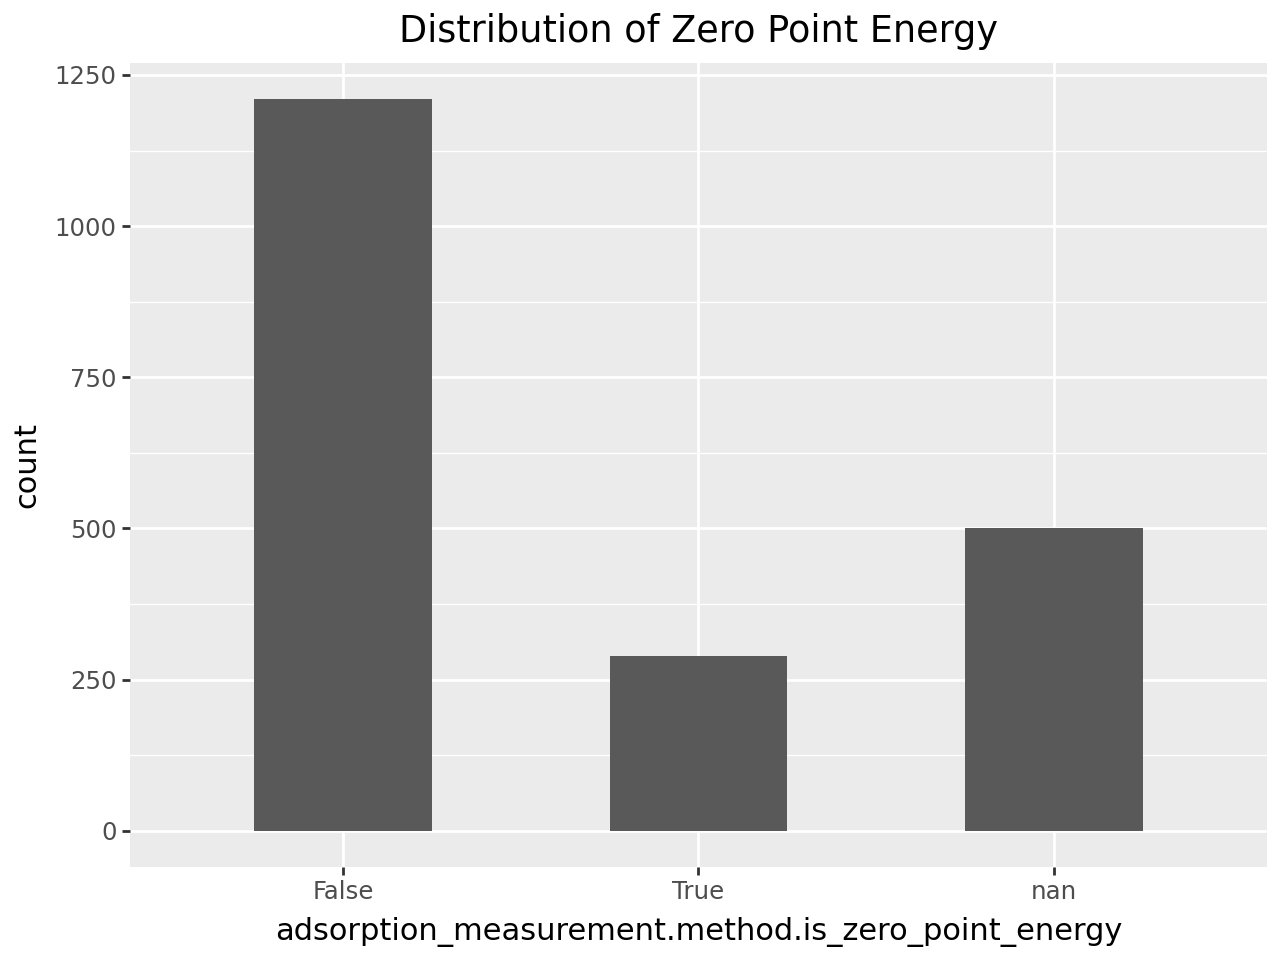

In [35]:
from plotnine import *
ZPE_bar_chart = (
    ggplot(df, aes(x="adsorption_measurement.method.is_zero_point_energy"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of Zero Point Energy")
)
ZPE_bar_chart

In [36]:
ZPE = pd.DataFrame(df["adsorption_measurement.method.is_zero_point_energy"])
ZPE

adsorption_measurement.method.is_zero_point_energy
0                                                   NaN
1                                                   NaN
2                                                   NaN
3                                                   NaN
4                                                   NaN
...                                                 ...
1995                                                NaN
1996                                                NaN
1997                                                NaN
1998                                                NaN
1999                                              False

[2000 rows x 1 columns]

In [37]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
ZPE = imp.fit_transform(ZPE)
ZPE = pd.DataFrame(ZPE)

In [38]:
df = df.drop(columns=["adsorption_measurement.method.is_zero_point_energy"])
df = pd.concat([df, ZPE], axis=1)
df = df.rename(columns={0: 'zero_point_energy'})

In [39]:
df["zero_point_energy"].isnull().values.any()

False

## Fixed Substrate

In [40]:
df["adsorption_measurement.method.is_fixed_substrate"].isnull().values.any()

True

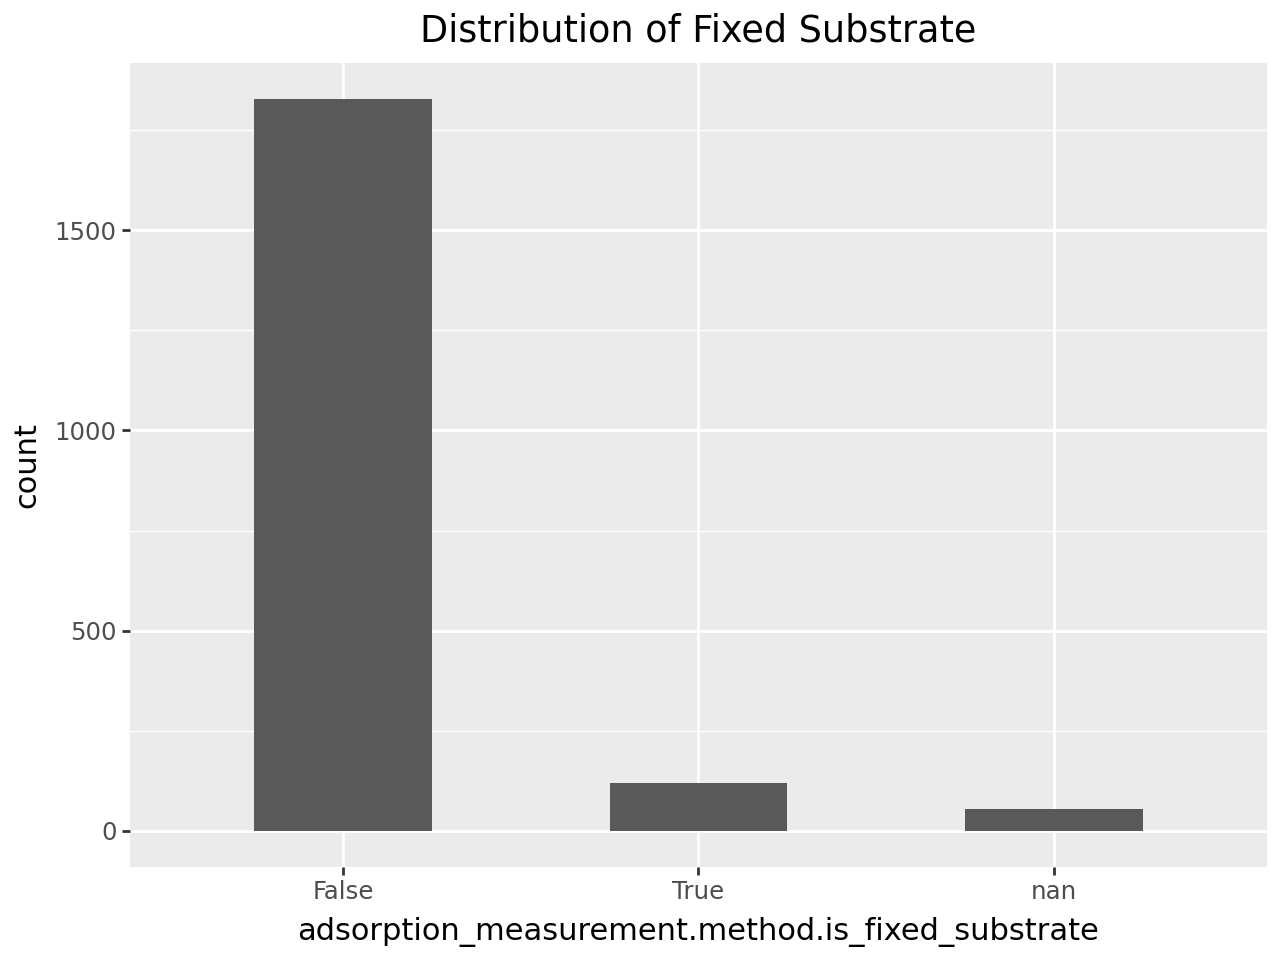

In [41]:
from plotnine import *
FixedSubstrate_bar_chart = (
    ggplot(df, aes(x="adsorption_measurement.method.is_fixed_substrate"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of Fixed Substrate")
)
FixedSubstrate_bar_chart

In [42]:
FixedSubstrate = pd.DataFrame(df["adsorption_measurement.method.is_fixed_substrate"])
FixedSubstrate.head()

adsorption_measurement.method.is_fixed_substrate
0                                            False
1                                            False
2                                              NaN
3                                              NaN
4                                              NaN

In [43]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
FixedSubstrate = imp.fit_transform(FixedSubstrate)
FixedSubstrate = pd.DataFrame(FixedSubstrate)

In [44]:
df = df.drop(columns=["adsorption_measurement.method.is_fixed_substrate"])
df = pd.concat([df, FixedSubstrate], axis=1)
df = df.rename(columns={0: 'Fixed_Substrate'})

In [45]:
df.head()

adsorption_energy exchange_correlation                       potentials  \
0              -4.29                 PW91        ultrasoft pseudopotential   
1              -0.56                 PW91        ultrasoft pseudopotential   
2              -3.14                 PW91  norm-conserving pseudopotential   
3              -0.50                 PW91  norm-conserving pseudopotential   
4              -1.67                 PW91        ultrasoft pseudopotential   

  adsorption_measurement.adsorbate_species.formula  \
0                                                O   
1                                               O2   
2                                                O   
3                                               O2   
4                                               O2   

  adsorption_measurement.adsorbate_species.smiles  \
0                                             [O]   
1                                             O=O   
2                                             [O]   
3                                             O=O   
4                                             O=O   

  adsorption_measurement.adsorbate_species.molecular_formula  \
0                                                  O           
1                                                 O2           
2                                                  O           
3                                                 O2           
4                                                 O2           

  adsorption_measurement.adsorbate_species.connectivity_smiles  \
0                                                [O]             
1                                             [O][O]             
2                                                [O]             
3                                             [O][O]             
4                                             [O][O]             

  adsorption_measurement.bulk_surface_property_set.termination  \
0                                                 Cu             
1                                                 Cu             
2                                                 Ag             
3                                                 Ag             
4                                                 Ni             

  adsorption_measurement.bulk_surface_property_set.space_group  \
0                                               Fm3m             
1                                               Fm3m             
2                                               Fm3m             
3                                               Fm3m             
4                                                NaN             

  adsorption_measurement.bulk_surface_property_set.bulk_surface_material.name  \
0                                                 Cu                            
1                                                 Cu                            
2                                                 Ag                            
3                                                 Ag                            
4                                                 Ni                            

   ...  29  30  double triple termination_atomic_num  facet_num software  \
0  ...   0   0       0      0                   29.0      111.0   Dacapo   
1  ...   0   0       1      0                   29.0      111.0   Dacapo   
2  ...   0   0       0      0                   47.0      110.0    CETEP   
3  ...   0   0       1      0                   47.0      110.0    CETEP   
4  ...   0   0       1      0                   28.0      111.0     VASP   

  spin_polarization  zero_point_energy  Fixed_Substrate  
0             False              False            False  
1             False              False            False  
2              True              False            False  
3              True              False            False  
4             False              False            False  

[5 rows x 57 columns]

In [46]:
df["Fixed_Substrate"].isnull().values.any()

False

# **Adsorbate**

## number of atoms

In [47]:
df["adsorbate_num_atoms"].isnull().values.any()

False

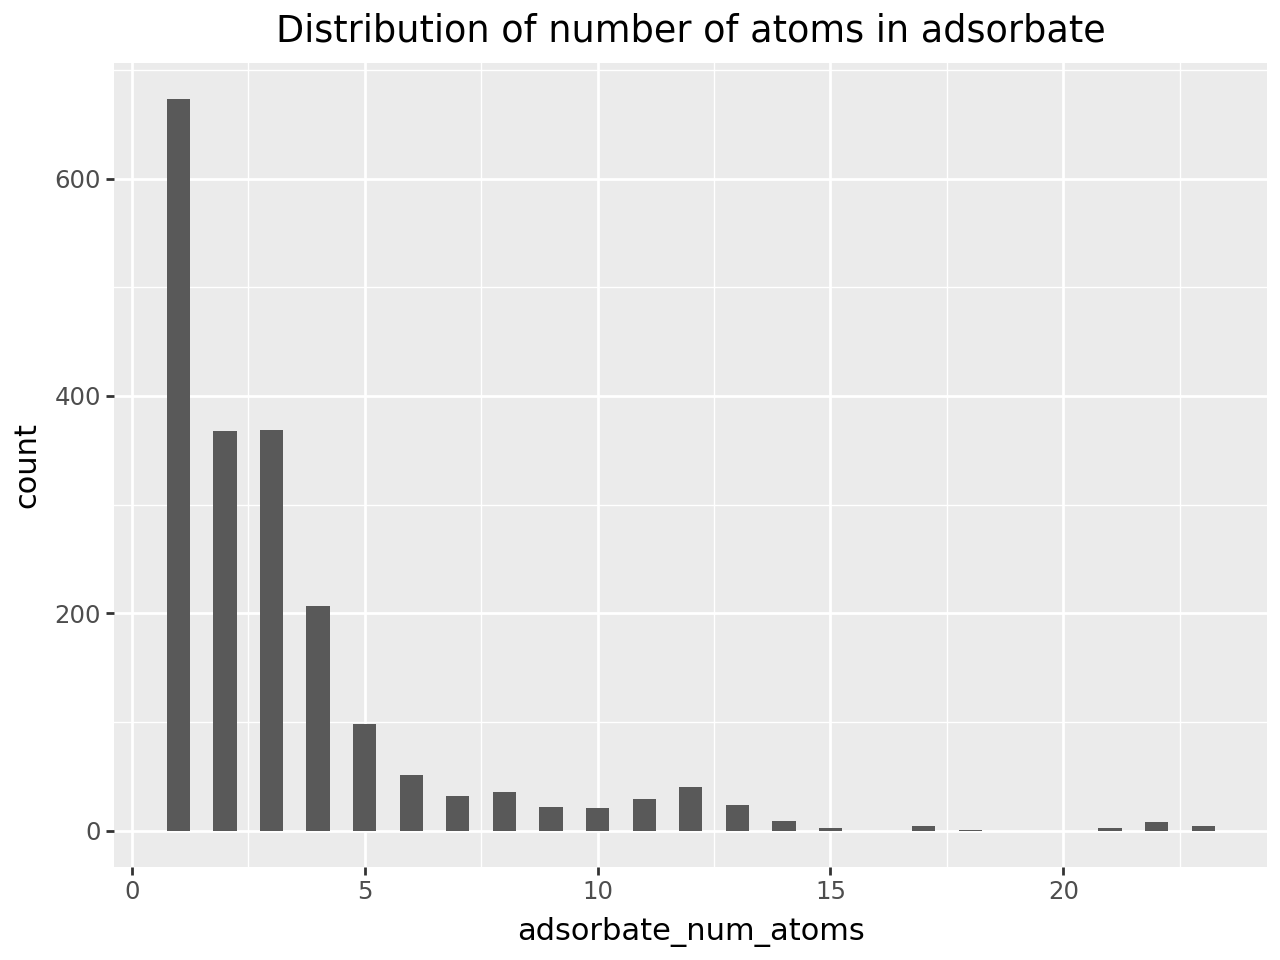

In [48]:
from plotnine import *
adsorbate_num_atoms_bar_chart = (
    ggplot(df, aes(x="adsorbate_num_atoms"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of number of atoms in adsorbate")
)
adsorbate_num_atoms_bar_chart

## atomic number of atoms

We will then change the name of the labels. 

In [49]:
atomic_number = {
    '1': 'atomic_num_1', '2': 'atomic_num_2', '3': 'atomic_num_3', '4': 'atomic_num_4', '5': 'atomic_num_5', '6': 'atomic_num_6', '7': 'atomic_num_6', '8': 'atomic_num_8', '9': 'atomic_num_9', '10':'atomic_num_10',
    '11': 'atomic_num_1', '12': 'atomic_num_12', '13':'atomic_num_13', '14':'atomic_num_14', '15':'atomic_num_15', '16':'atomic_num_16', '17':'atomic_num_17', '18':'atomic_num_18', '19':'atomic_num_19', '20':'atomic_num_20',
    '21': 'atomic_num_21', '22':'atomic_num_22', '23':'atomic_num_23', '24':'atomic_num_24', '25':'atomic_num_25', '26':'atomic_num_26', '27':'atomic_num_27', '28':'atomic_num_28', '29':'atomic_num_29', '30':'atomic_num_30', 
}

In [50]:
df = df.rename(columns=atomic_number)

In [51]:
formula_names = {
    'adsorption_measurement.adsorbate_species.formula': 'adsorbate_formula', 
    'adsorption_measurement.adsorbate_species.smiles': 'adsorbate_smiles',
    'adsorption_measurement.adsorbate_species.molecular_formula': 'adsorbate_molecular_formula',
    'adsorption_measurement.adsorbate_species.connectivity_smiles': 'adsorbate_connectivity_smiles'
}
df = df.rename(columns=formula_names)

## number of double and triple bonds

In [52]:
df.head()

adsorption_energy exchange_correlation                       potentials  \
0              -4.29                 PW91        ultrasoft pseudopotential   
1              -0.56                 PW91        ultrasoft pseudopotential   
2              -3.14                 PW91  norm-conserving pseudopotential   
3              -0.50                 PW91  norm-conserving pseudopotential   
4              -1.67                 PW91        ultrasoft pseudopotential   

  adsorbate_formula adsorbate_smiles adsorbate_molecular_formula  \
0                 O              [O]                           O   
1                O2              O=O                          O2   
2                 O              [O]                           O   
3                O2              O=O                          O2   
4                O2              O=O                          O2   

  adsorbate_connectivity_smiles  \
0                           [O]   
1                        [O][O]   
2                           [O]   
3                        [O][O]   
4                        [O][O]   

  adsorption_measurement.bulk_surface_property_set.termination  \
0                                                 Cu             
1                                                 Cu             
2                                                 Ag             
3                                                 Ag             
4                                                 Ni             

  adsorption_measurement.bulk_surface_property_set.space_group  \
0                                               Fm3m             
1                                               Fm3m             
2                                               Fm3m             
3                                               Fm3m             
4                                                NaN             

  adsorption_measurement.bulk_surface_property_set.bulk_surface_material.name  \
0                                                 Cu                            
1                                                 Cu                            
2                                                 Ag                            
3                                                 Ag                            
4                                                 Ni                            

   ...  atomic_num_29  atomic_num_30  double triple termination_atomic_num  \
0  ...              0              0       0      0                   29.0   
1  ...              0              0       1      0                   29.0   
2  ...              0              0       0      0                   47.0   
3  ...              0              0       1      0                   47.0   
4  ...              0              0       1      0                   28.0   

   facet_num software spin_polarization  zero_point_energy  Fixed_Substrate  
0      111.0   Dacapo             False              False            False  
1      111.0   Dacapo             False              False            False  
2      110.0    CETEP              True              False            False  
3      110.0    CETEP              True              False            False  
4      111.0     VASP             False              False            False  

[5 rows x 57 columns]

In [53]:
df["double"].isnull().values.any()

False

In [54]:
df["triple"].isnull().values.any()

False

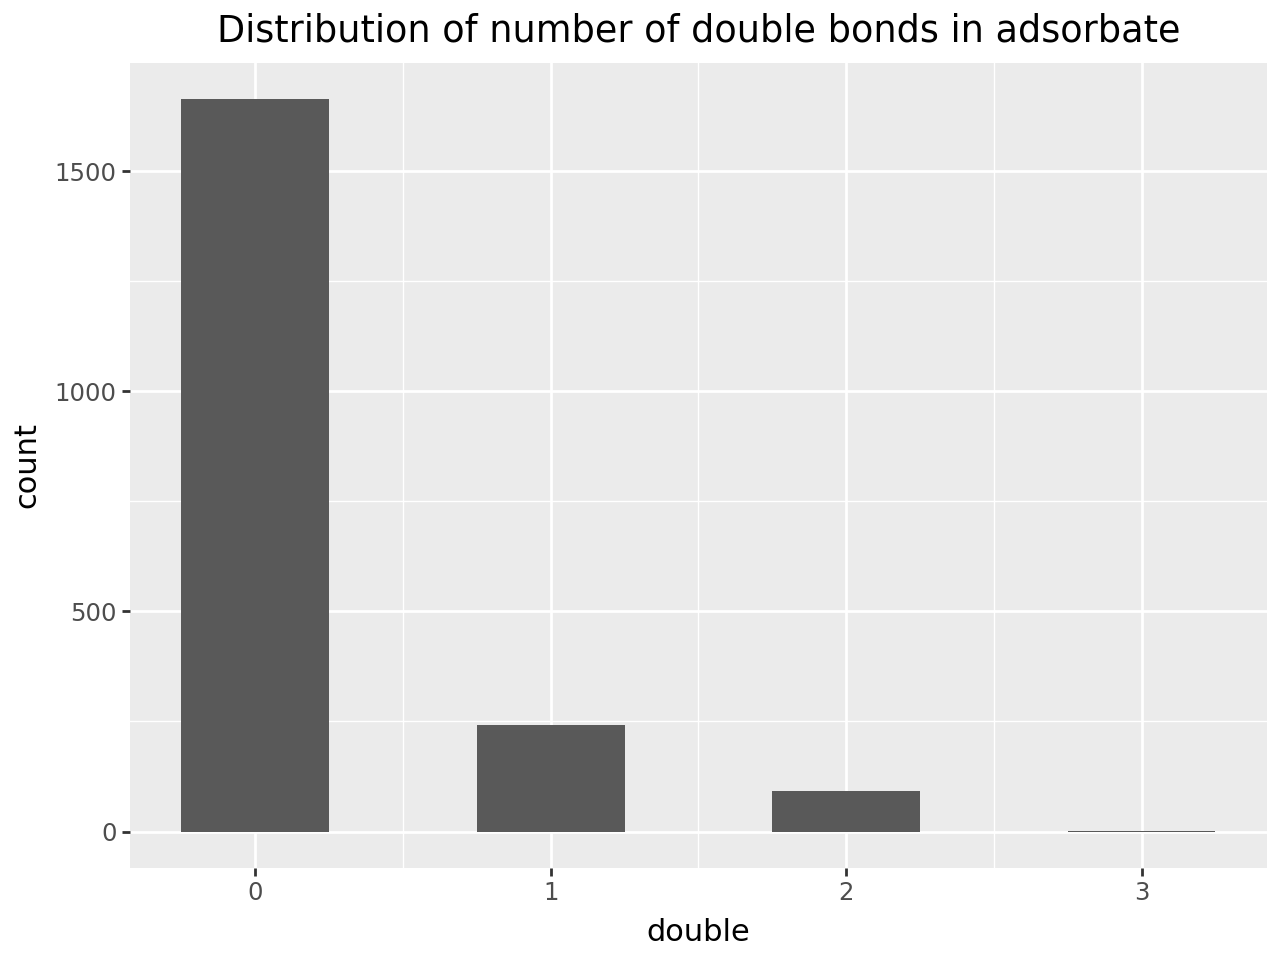

In [55]:
from plotnine import *
double_bar_chart = (
    ggplot(df, aes(x="double"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of number of double bonds in adsorbate")
)
double_bar_chart

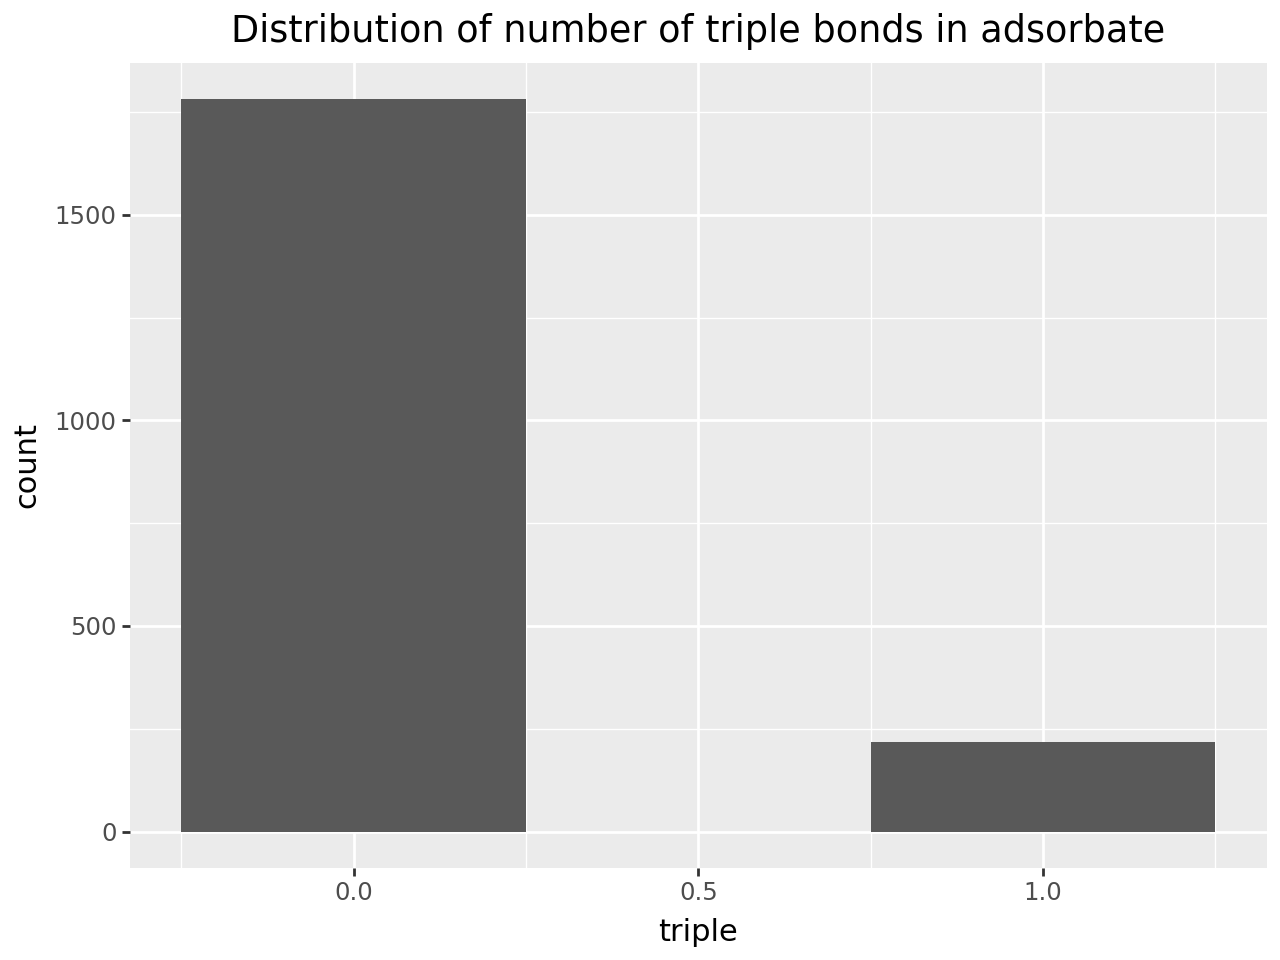

In [56]:
from plotnine import *
triple_bar_chart = (
    ggplot(df, aes(x="triple"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of number of triple bonds in adsorbate")
)
triple_bar_chart

# **Substrate**

## Termination

In [57]:
df["adsorption_measurement.bulk_surface_property_set.termination"].isnull().values.any()

False

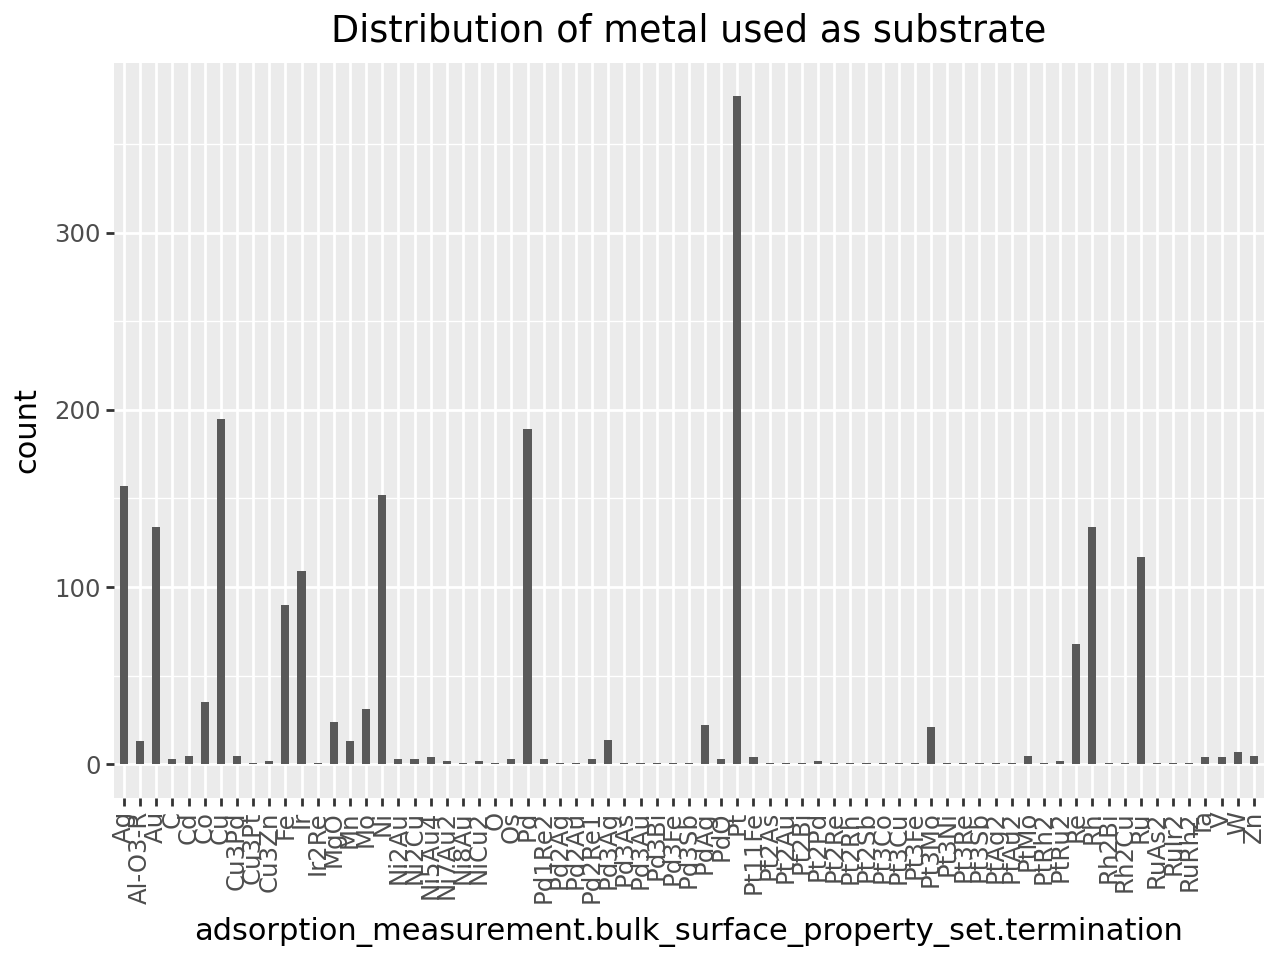

In [58]:
from plotnine import *
termination_bar_chart = (
    ggplot(df, aes(x="adsorption_measurement.bulk_surface_property_set.termination"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of metal used as substrate")
    + theme(axis_text_x = element_text(angle=90, hjust=5))
)
termination_bar_chart

## Lattice constant

In [59]:
df["adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_1"].isnull().values.any()

True

/Users/kyogonagashima/miniconda3/envs/csci373/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 530 rows containing non-finite values.


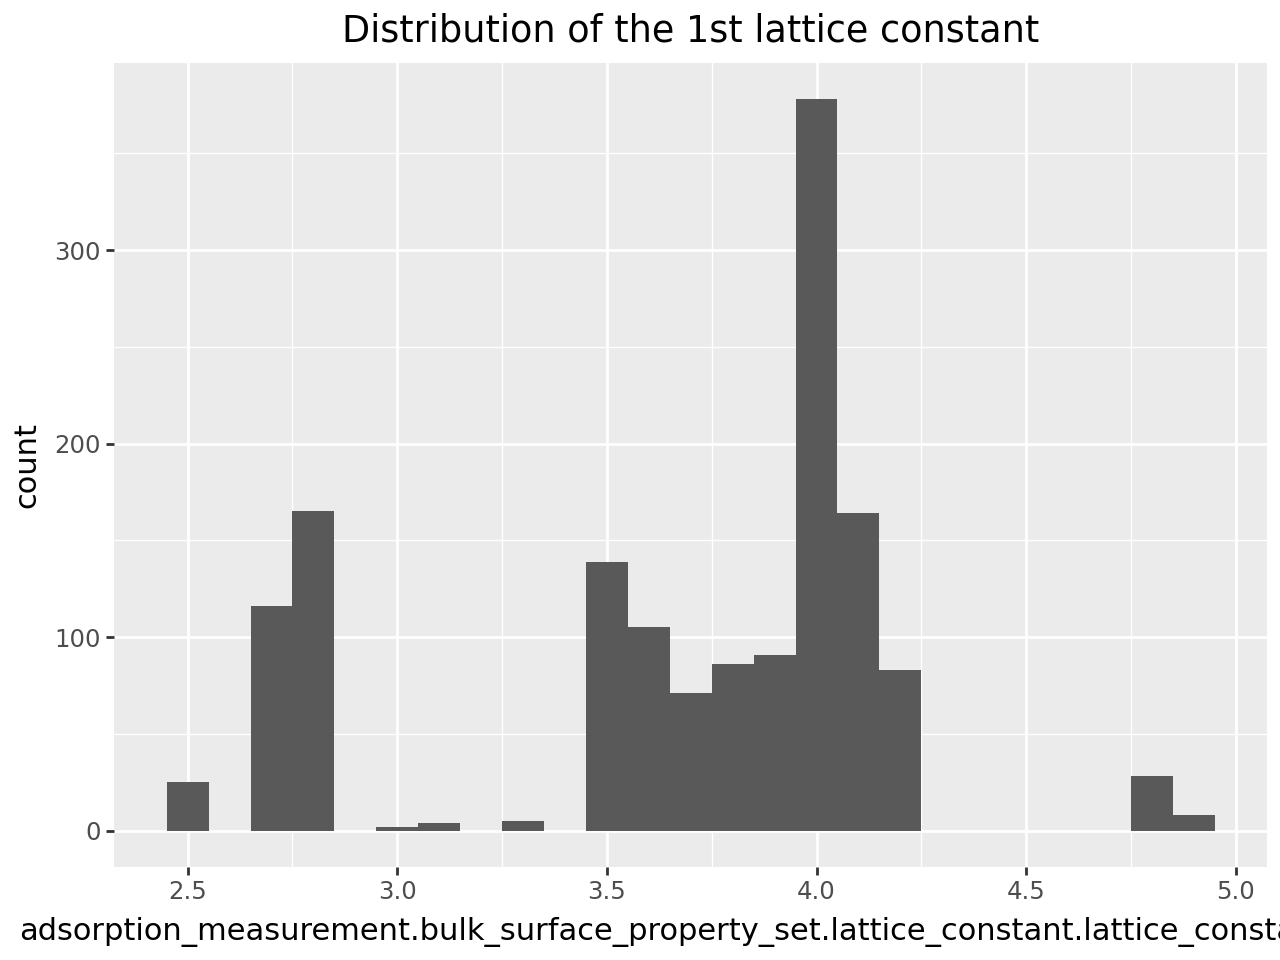

In [60]:
from plotnine import *
lattice_constant_bar_chart = (
    ggplot(df, aes(x="adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_1"))
    + geom_histogram(binwidth = 0.1)
    +ggtitle("Distribution of the 1st lattice constant")
)
lattice_constant_bar_chart

In [61]:
df["adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_1"]

0       3.660
1       3.660
2       4.190
3       4.190
4       3.532
        ...  
1995      NaN
1996      NaN
1997      NaN
1998      NaN
1999      NaN
Name: adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_1, Length: 2000, dtype: float64

In [62]:
LatticeConstant = pd.DataFrame(df["adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_1"])
LatticeConstant.head()

adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_1
0                                              3.660                                   
1                                              3.660                                   
2                                              4.190                                   
3                                              4.190                                   
4                                              3.532

In [63]:
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
LatticeConstant = imputer.fit_transform(LatticeConstant)
LatticeConstant = pd.DataFrame(LatticeConstant)

In [64]:
df = df.drop(columns=["adsorption_measurement.bulk_surface_property_set.lattice_constant.lattice_constant_1"])
df = pd.concat([df, LatticeConstant], axis=1)
df = df.rename(columns={0: 'LatticeConstant1'})

In [65]:
df.head()

adsorption_energy exchange_correlation                       potentials  \
0              -4.29                 PW91        ultrasoft pseudopotential   
1              -0.56                 PW91        ultrasoft pseudopotential   
2              -3.14                 PW91  norm-conserving pseudopotential   
3              -0.50                 PW91  norm-conserving pseudopotential   
4              -1.67                 PW91        ultrasoft pseudopotential   

  adsorbate_formula adsorbate_smiles adsorbate_molecular_formula  \
0                 O              [O]                           O   
1                O2              O=O                          O2   
2                 O              [O]                           O   
3                O2              O=O                          O2   
4                O2              O=O                          O2   

  adsorbate_connectivity_smiles  \
0                           [O]   
1                        [O][O]   
2                           [O]   
3                        [O][O]   
4                        [O][O]   

  adsorption_measurement.bulk_surface_property_set.termination  \
0                                                 Cu             
1                                                 Cu             
2                                                 Ag             
3                                                 Ag             
4                                                 Ni             

  adsorption_measurement.bulk_surface_property_set.space_group  \
0                                               Fm3m             
1                                               Fm3m             
2                                               Fm3m             
3                                               Fm3m             
4                                                NaN             

  adsorption_measurement.bulk_surface_property_set.bulk_surface_material.name  \
0                                                 Cu                            
1                                                 Cu                            
2                                                 Ag                            
3                                                 Ag                            
4                                                 Ni                            

   ...  atomic_num_30  double triple termination_atomic_num  facet_num  \
0  ...              0       0      0                   29.0      111.0   
1  ...              0       1      0                   29.0      111.0   
2  ...              0       0      0                   47.0      110.0   
3  ...              0       1      0                   47.0      110.0   
4  ...              0       1      0                   28.0      111.0   

  software spin_polarization  zero_point_energy  Fixed_Substrate  \
0   Dacapo             False              False            False   
1   Dacapo             False              False            False   
2    CETEP              True              False            False   
3    CETEP              True              False            False   
4     VASP             False              False            False   

   LatticeConstant1  
0             3.660  
1             3.660  
2             4.190  
3             4.190  
4             3.532  

[5 rows x 57 columns]

## Facet

In [66]:
df["facet_num"].isnull().values.any()

True

/Users/kyogonagashima/miniconda3/envs/csci373/lib/python3.11/site-packages/plotnine/layer.py:284: PlotnineWarning: stat_bin : Removed 45 rows containing non-finite values.


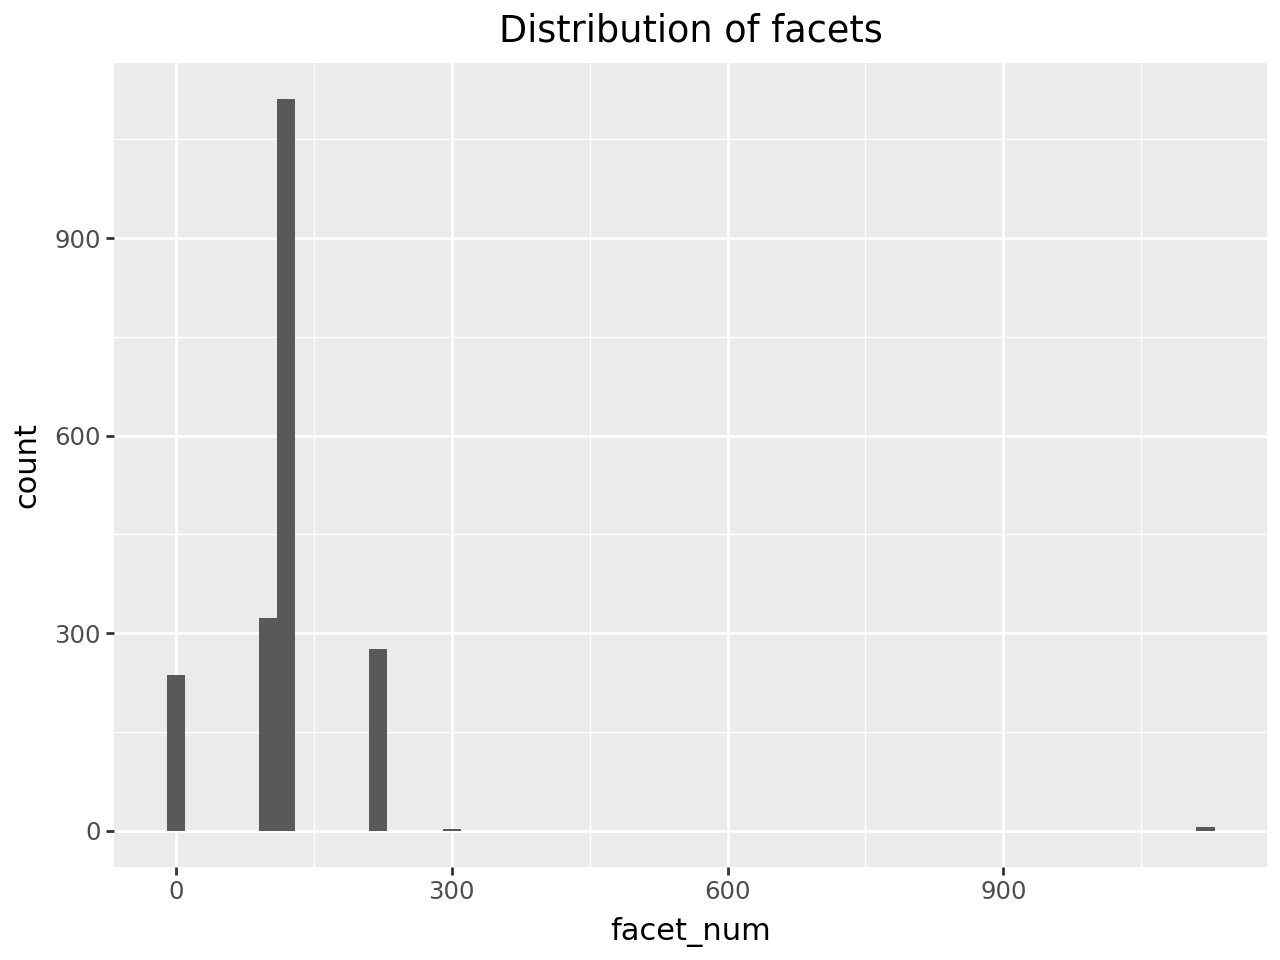

In [67]:
from plotnine import *
facet_bar_chart = (
    ggplot(df, aes(x="facet_num"))
    + geom_histogram(binwidth = 20)
    +ggtitle("Distribution of facets")
)
facet_bar_chart

In [68]:
facet = pd.DataFrame(df["facet_num"])
facet.head()

facet_num
0      111.0
1      111.0
2      110.0
3      110.0
4      111.0

In [69]:
import numpy as np
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
facet = imputer.fit_transform(facet)
facet = pd.DataFrame(facet)

In [70]:
df = df.drop(columns=["facet_num"])
df = pd.concat([df, facet], axis=1)

In [71]:
df = df.rename(columns={0: 'facet'})

In [72]:
df.head()

adsorption_energy exchange_correlation                       potentials  \
0              -4.29                 PW91        ultrasoft pseudopotential   
1              -0.56                 PW91        ultrasoft pseudopotential   
2              -3.14                 PW91  norm-conserving pseudopotential   
3              -0.50                 PW91  norm-conserving pseudopotential   
4              -1.67                 PW91        ultrasoft pseudopotential   

  adsorbate_formula adsorbate_smiles adsorbate_molecular_formula  \
0                 O              [O]                           O   
1                O2              O=O                          O2   
2                 O              [O]                           O   
3                O2              O=O                          O2   
4                O2              O=O                          O2   

  adsorbate_connectivity_smiles  \
0                           [O]   
1                        [O][O]   
2                           [O]   
3                        [O][O]   
4                        [O][O]   

  adsorption_measurement.bulk_surface_property_set.termination  \
0                                                 Cu             
1                                                 Cu             
2                                                 Ag             
3                                                 Ag             
4                                                 Ni             

  adsorption_measurement.bulk_surface_property_set.space_group  \
0                                               Fm3m             
1                                               Fm3m             
2                                               Fm3m             
3                                               Fm3m             
4                                                NaN             

  adsorption_measurement.bulk_surface_property_set.bulk_surface_material.name  \
0                                                 Cu                            
1                                                 Cu                            
2                                                 Ag                            
3                                                 Ag                            
4                                                 Ni                            

   ...  double  triple termination_atomic_num facet_num  software  \
0  ...       0       0                   29.0     111.0    Dacapo   
1  ...       1       0                   29.0     111.0    Dacapo   
2  ...       0       0                   47.0     110.0     CETEP   
3  ...       1       0                   47.0     110.0     CETEP   
4  ...       1       0                   28.0     111.0      VASP   

  spin_polarization zero_point_energy  Fixed_Substrate  LatticeConstant1  \
0             False             False            False             3.660   
1             False             False            False             3.660   
2              True             False            False             4.190   
3              True             False            False             4.190   
4             False             False            False             3.532   

   facet  
0  111.0  
1  111.0  
2  110.0  
3  110.0  
4  111.0  

[5 rows x 58 columns]

## Cell Symmetry

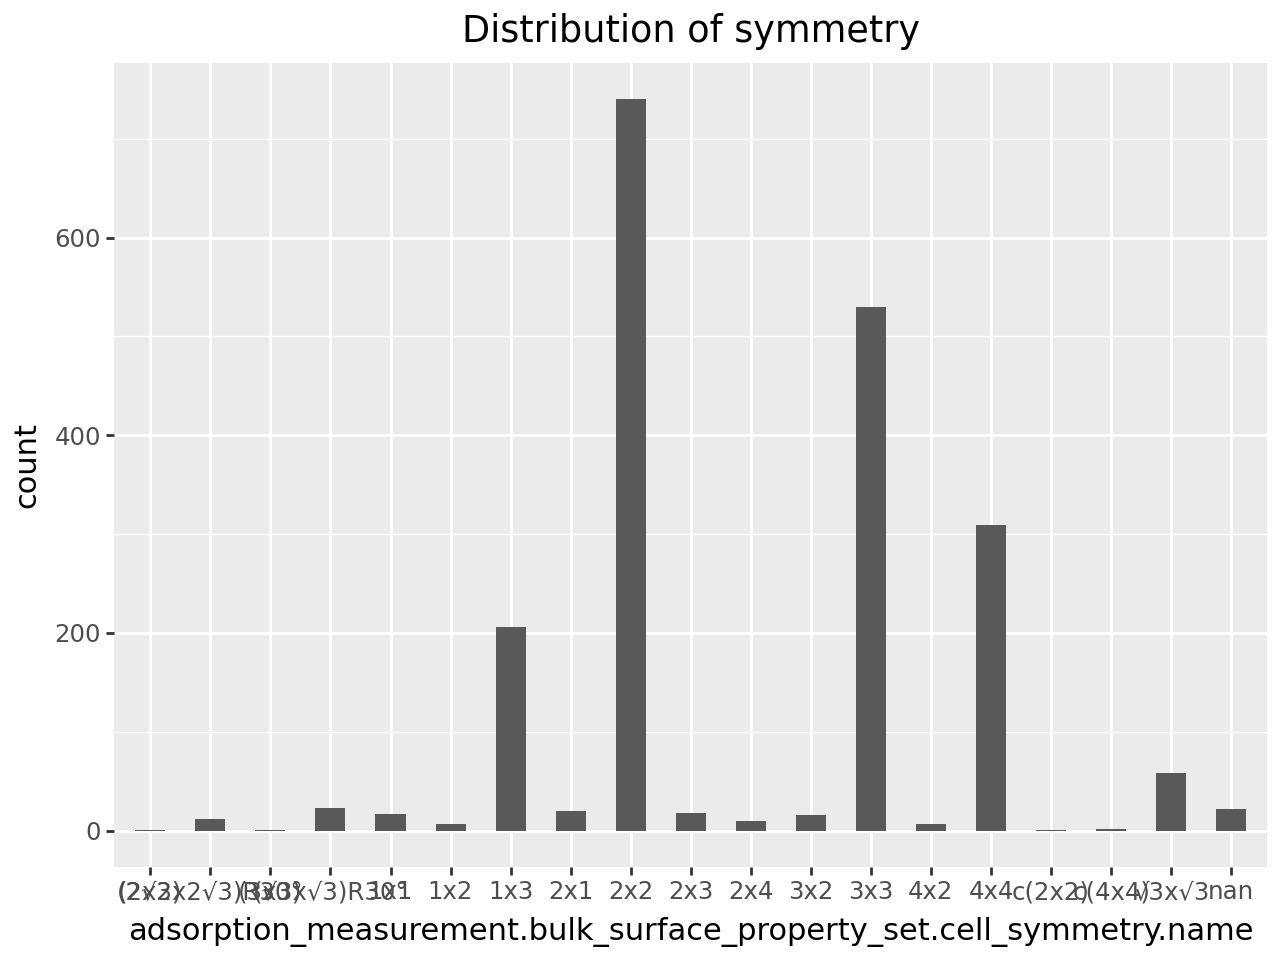

In [75]:
from plotnine import *
symmetry_bar_chart = (
    ggplot(df, aes(x="adsorption_measurement.bulk_surface_property_set.cell_symmetry.name"))
    + geom_histogram(binwidth = 0.5)
    +ggtitle("Distribution of symmetry")
)
symmetry_bar_chart

In [76]:
symmetry = pd.DataFrame(df["adsorption_measurement.bulk_surface_property_set.cell_symmetry.name"])
symmetry.head()

adsorption_measurement.bulk_surface_property_set.cell_symmetry.name
0                                                2x2                 
1                                                2x2                 
2                                                3x2                 
3                                                3x2                 
4                                                4x2

In [78]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy="most_frequent")
symmetry = imp.fit_transform(symmetry)
symmetry = pd.DataFrame(symmetry)

In [79]:
df = df.drop(columns=["adsorption_measurement.bulk_surface_property_set.cell_symmetry.name"])
df = pd.concat([df, symmetry], axis=1)
df = df.rename(columns={0: 'Substrate_Symmetry'})

In [80]:
df

adsorption_energy exchange_correlation                       potentials  \
0                 -4.29                 PW91        ultrasoft pseudopotential   
1                 -0.56                 PW91        ultrasoft pseudopotential   
2                 -3.14                 PW91  norm-conserving pseudopotential   
3                 -0.50                 PW91  norm-conserving pseudopotential   
4                 -1.67                 PW91        ultrasoft pseudopotential   
...                 ...                  ...                              ...   
1995              -1.72             BEEF-vdW         projector augmented wave   
1996               1.66             BEEF-vdW         projector augmented wave   
1997              -1.57             BEEF-vdW         projector augmented wave   
1998              -2.51             BEEF-vdW         projector augmented wave   
1999              -0.61                 RPBE        ultrasoft pseudopotential   

     adsorbate_formula adsorbate_smiles adsorbate_molecular_formula  \
0                    O              [O]                           O   
1                   O2              O=O                          O2   
2                    O              [O]                           O   
3                   O2              O=O                          O2   
4                   O2              O=O                          O2   
...                ...              ...                         ...   
1995                CH             [CH]                          CH   
1996                CH             [CH]                          CH   
1997              CH3O             C[O]                        CH3O   
1998              CHCO           [O]C#C                        CHCO   
1999               NH3                N                         NH3   

     adsorbate_connectivity_smiles  \
0                              [O]   
1                           [O][O]   
2                              [O]   
3                           [O][O]   
4                           [O][O]   
...                            ...   
1995                          [CH]   
1996                          [CH]   
1997                          C[O]   
1998                    [O][C][CH]   
1999                             N   

     adsorption_measurement.bulk_surface_property_set.termination  \
0                                                    Cu             
1                                                    Cu             
2                                                    Ag             
3                                                    Ag             
4                                                    Ni             
...                                                 ...             
1995                                                 Rh             
1996                                                 Ag             
1997                                                 Rh             
1998                                                 Ir             
1999                                                 Pd             

     adsorption_measurement.bulk_surface_property_set.space_group  \
0                                                  Fm3m             
1                                                  Fm3m             
2                                                  Fm3m             
3                                                  Fm3m             
4                                                   NaN             
...                                                 ...             
1995                                               Fm3m             
1996                                                NaN             
1997                                               Fm3m             
1998                                                NaN             
1999                                               Fm3m             

     adsorption_measurement.bulk_surface_property_set.bulk_surfac

In [83]:
df.to_csv("dataset_final_cleaned.csv", index=False)